In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
random.seed(1)
np.random.seed(23)

In [3]:
df = pd.read_excel('phase_sheet.xlsx')
data = df.to_numpy()
X = data[:,list(range(25))]
Y = data[:,25]
Y = Y - 1
Y = Y.astype(int)
X = X.astype(int)

print(f'The shape of input X is {X.shape}')
print(f'The shape of output Y is {Y.shape}')

The shape of input X is (383, 25)
The shape of output Y is (383,)


In [4]:
X_train = X
Y_train = Y
X_temp, X_, Y_temp, Y_= train_test_split(X, Y, test_size=0.30, random_state = 23)
X_test,X_cv,Y_test,Y_cv = train_test_split(X_, Y_, test_size=0.50, random_state = 23)
print(f'The shape of training set(input) is: {X_train.shape}')
print(f'The shape of training set(output) is: {Y_train.shape}')
print(f'The shape of CV set(input) is: {X_cv.shape}')
print(f'The shape of CV set(output) is: {Y_cv.shape}')
print(f'The shape of test set(input) is: {X_test.shape}')
print(f'The shape of test set(output) is: {Y_test.shape}')

The shape of training set(input) is: (383, 25)
The shape of training set(output) is: (383,)
The shape of CV set(input) is: (58, 25)
The shape of CV set(output) is: (58,)
The shape of test set(input) is: (57, 25)
The shape of test set(output) is: (57,)


In [5]:
# params = {
#     'n_estimators': 200,
#     'max_depth': 10,
#     'min_samples_split': 5,
#     'min_samples_leaf': 1
# }

In [6]:
# best_model = RandomForestClassifier(**params)
# best_model.fit(X_train, Y_train)
# flag = 1
# print(best_model)

In [7]:
n_estimators_range =  [50,100]
max_depth_range= [5,10]
sample_split_range = [2,5,10]
samples_leaf_range = [1,2,4]
best_model = None
best_params = None
flag = 0

for n_estimators in n_estimators_range:
    print(n_estimators)
    for max_depth in max_depth_range:
        for sample_split in sample_split_range:
            for samples_leaf in samples_leaf_range:
                params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': sample_split,
                    'min_samples_leaf': samples_leaf
                }
                model = RandomForestClassifier(**params, random_state=42)
                model.fit(X_train,Y_train)

                Y_train_hat = model.predict(X_train)
                train_accuracy = accuracy_score(Y_train,Y_train_hat)

                Y_cv_hat = model.predict(X_cv)
                val_accuracy = accuracy_score(Y_cv,Y_cv_hat)

                Y_test_hat = model.predict(X_test)
                test_accuracy = accuracy_score(Y_test,Y_test_hat)

                if train_accuracy >val_accuracy and train_accuracy > test_accuracy and train_accuracy > 0.9:
                    best_params = params
                    best_model = model
                    print(params)
                    flag = 1

print(best_model)
print(best_params)

50
100
{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
RandomForestClassifier(max_depth=10, random_state=42)
{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [8]:
if flag == 1:
    Y_train_hat = best_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train,Y_train_hat)
    print(f'Training Accuracy: {train_accuracy}')

    Y_cv_hat = best_model.predict(X_cv)
    val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
    print(f'Validation Accuracy: {val_accuracy}')

    Y_test_hat = best_model.predict(X_test)
    test_accuracy = accuracy_score(Y_test,Y_test_hat)
    print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9556135770234987
Validation Accuracy: 0.9482758620689655
Testing Accuracy: 0.9122807017543859


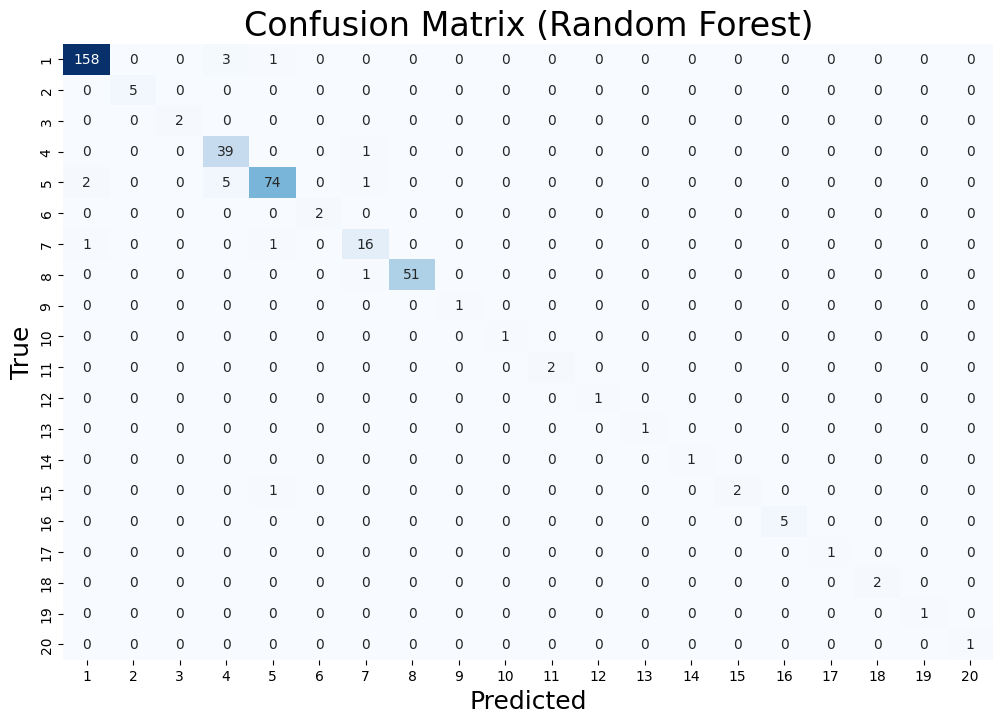

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming your predictions are stored in 'y_pred'
conf_matrix = confusion_matrix(Y_train, Y_train_hat)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding 1 to class labels for display purposes
class_labels = [str(i) for i in range(1, 21)]
plt.xticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)
plt.yticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('Confusion Matrix (Random Forest)', fontsize=24)
plt.savefig('rf/cf.png')
plt.show()

In [10]:
print(best_params)
b_model = RandomForestClassifier(**best_params, random_state=42)
b_model.fit(X_train, Y_train)
flag = 1
if flag == 1:
    Y_train_hat = b_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train,Y_train_hat)
    print(f'Training Accuracy: {train_accuracy}')

    Y_cv_hat = b_model.predict(X_cv)
    val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
    print(f'Validation Accuracy: {val_accuracy}')

    Y_test_hat = b_model.predict(X_test)
    test_accuracy = accuracy_score(Y_test,Y_test_hat)
    print(f'Testing Accuracy: {test_accuracy}')

{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Training Accuracy: 0.9556135770234987
Validation Accuracy: 0.9482758620689655
Testing Accuracy: 0.9122807017543859


In [11]:
import math

train_accuracy = math.floor(train_accuracy * 100) / 100
print(train_accuracy)

val_accuracy = math.floor(val_accuracy * 100) / 100
print(val_accuracy)

test_accuracy = math.floor(test_accuracy * 100) / 100
print(test_accuracy)

0.95
0.94
0.91


In [12]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

wb = Workbook()
ws = wb.active

j = 1

ws[str(get_column_letter(j)) + str(1)].value = 'Train_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = train_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'Val_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = val_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'test_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = test_accuracy

j += 1

wb.save('rf/result.xlsx')
print('Done')

Done


In [13]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'rf/rf.joblib')

['rf/rf.joblib']